In [66]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import sys
from helpers_task_detector import *
sys.path.append('../')
from src.helpers import *
from src.visualize import *
from src.trainer import *
from src.trainer_hnet import * 
from Models.models import *

In [67]:
experiment_name = 'Experiment19'
path_results = './Results/' + experiment_name

In [68]:
path_to_hnets = './Models/Models_HNET'
data_path = './Data/Sim_Data_'+experiment_name+'.pkl'

#models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

In [69]:
data.keys()

dict_keys(['Data_2_2', 'Data_3_2', 'Data_1_1', 'Data_0_1', 'Data_4_2', 'Data_0_2', 'Data_4_1', 'Data_3_1', 'Data_2_1', 'Data_1_2'])

In [65]:
with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
    results = pickle.load(fp)

In [40]:
results['Data_0_1'].keys()

dict_keys(['predicted_task', 'new_task', 'r2_test_detector', 'r2_test_hnet', 'y_true_hnet', 'y_pred_hnet'])

In [41]:
dataset = []
r2_test_detector = []
r2_test_hnet = []
y_true_detector = []
y_pred_detector = []
y_true_hnet = []
y_pred_hnet = []
predicted_task = []
new_task = []
max_id = 0
found_ids = []
true_task = []

with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
    results = pickle.load(fp)
    for set in results.keys():
        dataset.append(set)
        r2_test_detector.append(results[set]['r2_test_detector'])
        r2_test_hnet.append(results[set]['r2_test_hnet'])
        predicted_task.append(results[set]['predicted_task'])
        new_task.append(results[set]['new_task'])
        if 'y_true_hnet' in results[set].keys():
            y_true_hnet.append([results[set]['y_true_hnet']])
            y_pred_hnet.append([results[set]['y_pred_hnet']])
        else:
            y_true_hnet.append([0])
            y_pred_hnet.append([0])
        if 'y_true_detector' in results[set].keys():
            y_true_detector.append([results[set]['y_true_detector']])
            y_pred_detector.append([results[set]['y_pred_detector']])
        else:
            y_true_detector.append([0])
            y_pred_detector.append([0])
        
        new_id = set.split('_')[1]
        if new_id not in found_ids:
            found_ids.append(new_id)
            true_task.append(max_id)
            max_id += 1
        else:
            idx_id = found_ids.index(new_id)
            true_task.append(idx_id)

In [42]:
df = pd.DataFrame({'Dataset':dataset,
                   'True_Task': true_task,
                   'Predicted_Task' : predicted_task,
                   'New_Task': new_task, 
                    'Y_t_detector': y_true_detector,
                    'Y_p_detector':y_pred_detector,  
                    'R2_Detector':r2_test_detector,
                    'Y_t_hnet': y_true_hnet,
                    'Y_p_hnet':y_pred_hnet,  
                    'R2_hnet':r2_test_hnet})

In [43]:
df

,Dataset,True_Task,Predicted_Task,New_Task,Y_t_detector,Y_p_detector,R2_Detector,Y_t_hnet,Y_p_hnet,R2_hnet
0,Data_4_2,0,0,True,"[[[0.31738815, -0.5622112], [0.40956837, -0.03...","[[[0.61753845, -1.394777], [1.2361788, -1.2718...",0.838932,"[[[[ 0.31738816 -0.56221119], [ 0.40956837 -0....","[[[[ 2.9036622 -1.2870619], [-0.0093964 -1.525...",0.770570
1,Data_1_1,1,1,True,"[[[-0.3283002, 0.23977958], [-0.5093526, 0.233...","[[[-0.4099441, -1.7643145], [0.055460878, -1.9...",0.818680,"[[[[-0.32830022 0.23977958], [-0.50935261 0....","[[[[ 0.9582385 -0.7992941], [-1.9678389 -0.83...",0.781141
2,Data_0_2,2,2,True,"[[[-0.21928415, 0.12648028], [-0.14847842, -0....","[[[-1.3078963, 1.1879206], [-1.0007793, 1.4602...",0.887108,"[[[[-0.21928415 0.12648028], [-0.14847842 -0....","[[[[-1.647012 -0.30549663], [-1.5779933 0....",0.846371
3,Data_0_1,2,2,False,[0],[0],0.821609,"[[[[0.99552168 1.19585254], [0.88102031 1.0264...","[[[[-1.3392612 -0.16476822], [-0.804662 1.5...",0.808269
4,Data_3_1,3,3,True,"[[[-0.35842186, -0.41775602], [-0.2978156, -0....","[[[0.08880092, -0.08586409], [0.53867954, -0.3...",0.812305,"[[[[-0.35842187 -0.41775601], [-0.29781559 -0....","[[[[-1.2167605 0.24359247], [-0.08058336 -1....",0.818105
5,Data_2_2,4,4,True,"[[[-0.10953294, 0.18710083], [-0.29330918, 0.0...","[[[1.3462082, -0.94327265], [1.9846299, -0.420...",0.804942,"[[[[-0.10953294 0.18710083], [-0.29330917 0....","[[[[2.4834146 0.88903475], [2.4165406 0.3004...",0.819486
6,Data_3_2,3,3,False,[0],[0],0.741261,"[[[[-1.6104942 -0.62938231], [-0.6666122 0....","[[[[-3.9493208 1.3836278], [-3.1691036 2.941...",0.793302
7,Data_2_1,4,4,False,[0],[0],0.856368,"[[[[0.87900067 0.94454102], [0.46398438 0.7024...","[[[[-0.53741765 -2.0014489 ], [ 1.0577155 -1.0...",0.784510
8,Data_4_1,0,0,False,[0],[0],0.812654,"[[[[0.29785638 0.35387847], [0.29678001 0.3544...","[[[[ 1.0476657 -1.1737471], [ 1.979056 -0.497...",0.403036
9,Data_1_2,1,2,False,[0],[0],0.708123,"[[[[-0.35842187 -0.41775601], [-0.29781559 -0....","[[[[6.4508657 5.213309 ], [6.031171 2.4744453...",0.690757


### Assess continual learning on hypernetwork

The idea here is to load all hypernets, after each task has been learned, and then test for each model on the trained task + all the previously seen tasks.

In [44]:
path_to_hnets = './Models/Models_HNET'

models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)

### Change and add here the true task to know which model to use

In [45]:
model = []
test_set = []
r2_list = []
data_name = []
for i,m in enumerate(models_exp):
    model_i = torch.load(os.path.join(path_to_hnets,experiment_name, m))
    print(model_i)
    for task,set in zip(df.True_Task, data.keys()):
        perturbed_task = set.split('_')[1]

        if perturbed_task == '0':
            name = 'Baseline'
        elif perturbed_task == '1':
            name = 'Removed Neurons'    
        elif perturbed_task == '2':
            name = 'Shuffled Neurons'
        elif perturbed_task == '3':
            name = 'Gain' 
        elif perturbed_task == '4':
            name = 'Offset'
        
        if task <= i :
            W = model_i(cond_id = task)
            main_net = RNN_Main_Model(num_features= 130, hnet_output = W,  hidden_size = 300,
                                num_layers= 1,out_dims=2,  
                                dropout= 0.2,  LSTM_ = False)
            x_train, y_train, x_val, y_val, x_test, y_test = data[set]
            r2, _ = calc_explained_variance_mnet(x_test, y_test, W, main_net)
            model.append(m)
            test_set.append(set)
            r2_list.append(r2)
            data_name.append(name)    

Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of

In [46]:
model = []
test_set = []
r2_list = []
data_name = []

for task,set in zip(df.Predicted_Task, data.keys()):
    perturbed_task = set.split('_')[1]
    if perturbed_task == '0':
        name = 'Baseline'
    elif perturbed_task == '1':
        name = 'Removed Neurons'    
    elif perturbed_task == '2':
        name = 'Shuffled Neurons'
    elif perturbed_task == '3':
        name = 'Gain' 
    elif perturbed_task == '4':
        name = 'Offset'

    for i,m in enumerate(models_exp):
        model_i = torch.load(os.path.join(path_to_hnets,experiment_name, m))
        print(model_i)
        if task <= i :
            W = model_i(cond_id = task)
            main_net = RNN_Main_Model(num_features= 130, hnet_output = W,  hidden_size = 300,
                                num_layers= 1,out_dims=2,  
                                dropout= 0.2,  LSTM_ = False)
            x_train, y_train, x_val, y_val, x_test, y_test = data[set]
            r2, _ = calc_explained_variance_mnet(x_test, y_test, W, main_net)
            model.append(m)
            test_set.append(set)
            r2_list.append(r2)
            data_name.append(name)    

Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).


Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of 1822945 unconditional weights (1822945 internally maintained) and 480 conditional weights (480 internally maintained).
Hypernetwork with 1823425 weights and 130202 outputs (compression ratio: 14.00).
The network consists of

In [47]:
df_plot = pd.DataFrame({ 'Model':model,
                    'Name' : data_name,
                    'Dataset':test_set,
                    'R2': r2_list})

In [48]:
df_plot

,Model,Name,Dataset,R2
0,Model_Task_0.pth,Offset,Data_4_2,0.768138
1,Model_Task_1.pth,Offset,Data_4_2,0.474456
2,Model_Task_2.pth,Offset,Data_4_2,0.473823
3,Model_Task_3.pth,Offset,Data_4_2,0.477755
4,Model_Task_4.pth,Offset,Data_4_2,0.473640
5,Model_Task_1.pth,Removed Neurons,Data_1_1,0.785006
6,Model_Task_2.pth,Removed Neurons,Data_1_1,0.793937
7,Model_Task_3.pth,Removed Neurons,Data_1_1,0.791747
8,Model_Task_4.pth,Removed Neurons,Data_1_1,0.786209
9,Model_Task_2.pth,Baseline,Data_0_2,0.848967


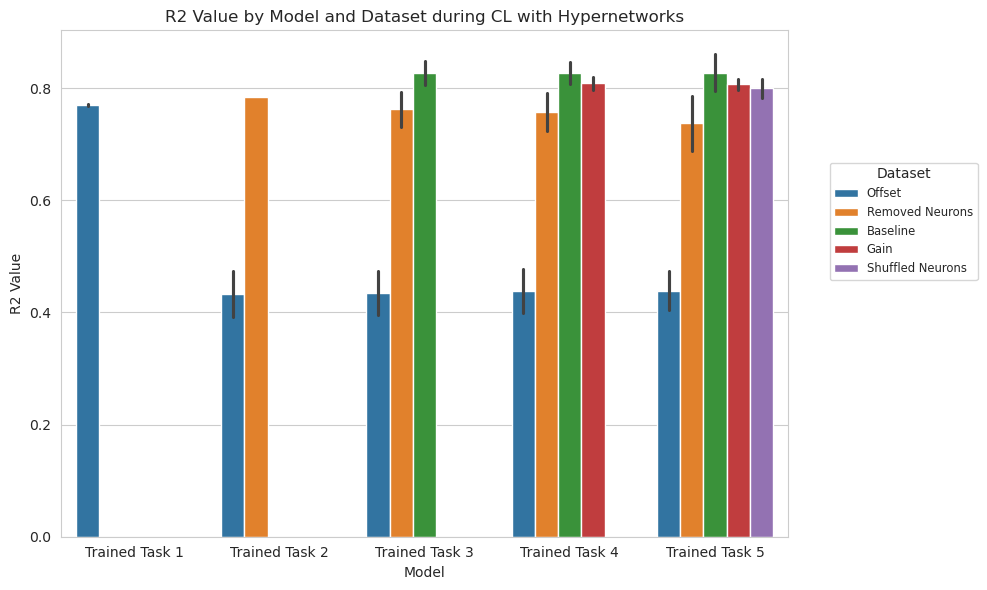

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))

sns.barplot(data=df_plot, x='Model', y='R2', hue='Name')#, color = 'Name', ci=None)  # ci=None to remove confidence intervals

plt.title('R2 Value by Model and Dataset during CL with Hypernetworks')

plt.xlabel('Model')

plt.ylabel('R2 Value')

new_labels = ['Trained Task 1', 'Trained Task 2', 'Trained Task 3', 'Trained Task 4', 'Trained Task 5']  # New labels for x-axis

plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

""" legend_labels = ['Baseline 1', 'Baseline 1', 'Removed Neurons 1', 'Removed Neurons 2',
                 'Shuffled Neurons 1', 'Shuffled Neurons 1', 'Added Gain 1', 'Added Gain 2',
                 'Added Offset 1', 'Added Offset 2']  # New labels for legend """

plt.legend(title='Dataset', fontsize = 'small', 
        bbox_to_anchor=(1.05, 0.75),
        loc='upper left') 
        #labels=legend_labels)  # Move legend to upper left corner

plt.tight_layout()
plt.show()

In [76]:
data['Data_0_1'][0].shape

(30, 100, 130)

### Plot the accuracy of detection vs num of trials used

In [11]:
def create_table_results(experiment_name):
    dataset = []
    r2_test_detector = []
    r2_test_hnet = []
    y_true_detector = []
    y_pred_detector = []
    y_true_hnet = []
    y_pred_hnet = []
    predicted_task = []
    new_task = []
    max_id = 0
    found_ids = []
    true_task = []

    path_results = './Results/' + experiment_name
    
    with open(os.path.join(path_results +'.pkl'), 'rb') as fp:
        results = pickle.load(fp)
    for set in results.keys():
        dataset.append(set)
        r2_test_detector.append(results[set]['r2_test_detector'])
        r2_test_hnet.append(results[set]['r2_test_hnet'])
        predicted_task.append(results[set]['predicted_task'])
        new_task.append(results[set]['new_task'])
        if 'y_true_hnet' in results[set].keys():
            y_true_hnet.append([results[set]['y_true_hnet']])
            y_pred_hnet.append([results[set]['y_pred_hnet']])
        else:
            y_true_hnet.append([0])
            y_pred_hnet.append([0])
        if 'y_true_detector' in results[set].keys():
            y_true_detector.append([results[set]['y_true_detector']])
            y_pred_detector.append([results[set]['y_pred_detector']])
        else:
            y_true_detector.append([0])
            y_pred_detector.append([0])
        
        new_id = set.split('_')[1]
        if new_id not in found_ids:
            found_ids.append(new_id)
            true_task.append(max_id)
            max_id += 1
        else:
            idx_id = found_ids.index(new_id)
            true_task.append(idx_id)
    df = pd.DataFrame({'Dataset':dataset,
                   'True_Task': true_task,
                   'Predicted_Task' : predicted_task,
                   'New_Task': new_task, 
                    'Y_t_detector': y_true_detector,
                    'Y_p_detector':y_pred_detector,  
                    'R2_Detector':r2_test_detector,
                    'Y_t_hnet': y_true_hnet,
                    'Y_p_hnet':y_pred_hnet,  
                    'R2_hnet':r2_test_hnet}) 
    return df


In [12]:
exp_num_trials = {'Experiment7': 5, 
                  'Experiment8': 1,
                  'Experiment9': 10, 
                  'Experiment10': 15, 
                  'Experiment11': 20, 
                  'Experiment12': 25, 
                  'Experiment13': 30, 
                  'Experiment14': 35, 
                  'Experiment15': 40,
                  'Experiment16': 45, 
                  'Experiment17': 50,  }

In [31]:
def average_results(min, max):
    num_trials = []
    acc_detector = []
    r2_detector = []
    for i in range(min, max):
        experiment_name = 'Experiment'+str(i)
        df = create_table_results(experiment_name)
        num_trials.append(exp_num_trials[experiment_name])
        r2_detector.append(df.R2_Detector.mean())
        acc_detector.append((np.sum(df.True_Task == df.Predicted_Task)*10))
    df = pd.DataFrame({'Number Trials':num_trials,
                   'Accuracy Task Detector': acc_detector,
                   'R2 Task Detector' : r2_detector,
                  }) 
    df = df.sort_values(by = 'Number Trials')
    return df


In [34]:
df = average_results(7, 18)

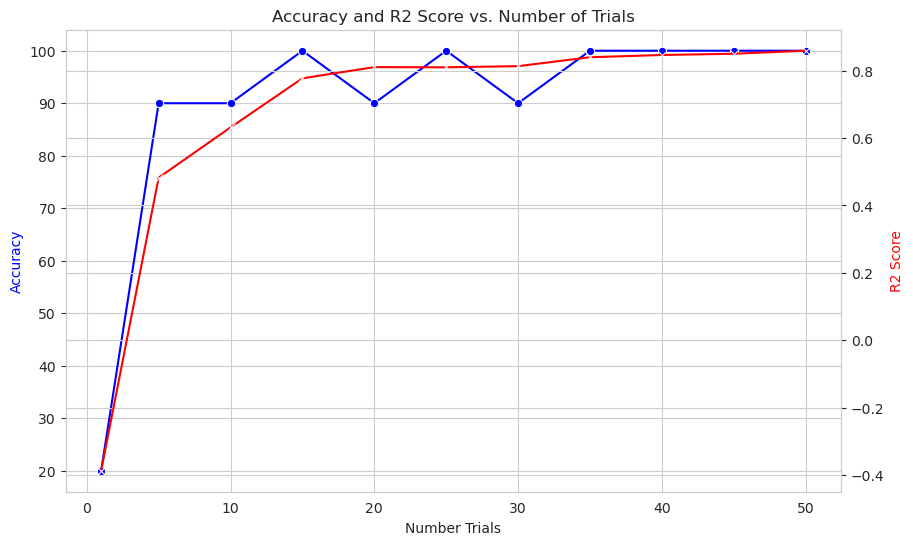

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the seaborn style
sns.set_style("whitegrid")

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the accuracy on the primary y-axis
sns.lineplot(data=df, x='Number Trials', y='Accuracy Task Detector', ax=ax1, marker='o', color='b')
ax1.set_ylabel('Accuracy', color='b')

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Number Trials', y='R2 Task Detector', ax=ax2, marker='x', color='r')
ax2.set_ylabel('R2 Score', color='r')

# Add title
plt.title('Accuracy and R2 Score vs. Number of Trials')

# Show plot
plt.show()


In [ ]:


#models_exp = np.sort(os.listdir(os.path.join(path_to_hnets, experiment_name)))

with open(os.path.join(data_path), 'rb') as fp:
    data = pickle.load(fp)